# STEP-BY-STEP for Monte Carlo for Forecast the Gold Pricing

# Pre-requisites
- Data source: https://huggingface.co/datasets/mltrev23/gold-price/blob/main/FINAL_USO.csv

In [5]:
%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


# Step 1: Import Libraries

Open a new code cell and run the following code to import necessary libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the Dataset

Upload your FINAL_USO.csv dataset to the same directory as your notebook file. In a new cell, load and preview the data:

In [4]:
# Load the dataset
data = pd.read_csv("FINAL_USO.csv")
# Display the first few rows to understand the structure
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


# Step 3: Process the Date Column and Sort Data

Ensure the data is in chronological order, and convert the Date column to datetime:

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Step 4: Calculate Daily Returns

Use the Adj Close column to compute daily returns, which will be the basis for the simulation:

In [8]:
data['Daily Return'] = data['Adj Close'].pct_change()
daily_returns = data['Daily Return'].dropna()
daily_returns.describe()  # Optional: View return stats for reference

count    1717.000000
mean       -0.000087
std         0.009614
min        -0.087808
25%        -0.004994
50%         0.000000
75%         0.004574
max         0.074633
Name: Daily Return, dtype: float64

# Step 5: Set up Monte Carlo Simulation Parameters

Define the number of simulations and the number of days to forecast (e.g., 1 year or 252 trading days):

In [9]:
num_simulations = 1000  # Number of simulation paths
num_days = 252  # Number of trading days to forecast (1 year)
starting_price = data['Adj Close'].iloc[-1]  # Latest adjusted close price

# Step 6: Run Monte Carlo Simulations

This loop will simulate the price paths. Each path represents a possible future price trajectory:

In [10]:
# Initialize an array to store the simulated prices
simulated_prices = np.zeros((num_days, num_simulations))

# Populate the simulated prices matrix
for i in range(num_simulations):
    simulated_prices[0, i] = starting_price
    for j in range(1, num_days):
        random_daily_return = np.random.normal(daily_returns.mean(), daily_returns.std())
        simulated_prices[j, i] = simulated_prices[j - 1, i] * (1 + random_daily_return)


# Step 7: Visualize Simulated Paths

Use this code to create a plot showing the range of simulated price paths:

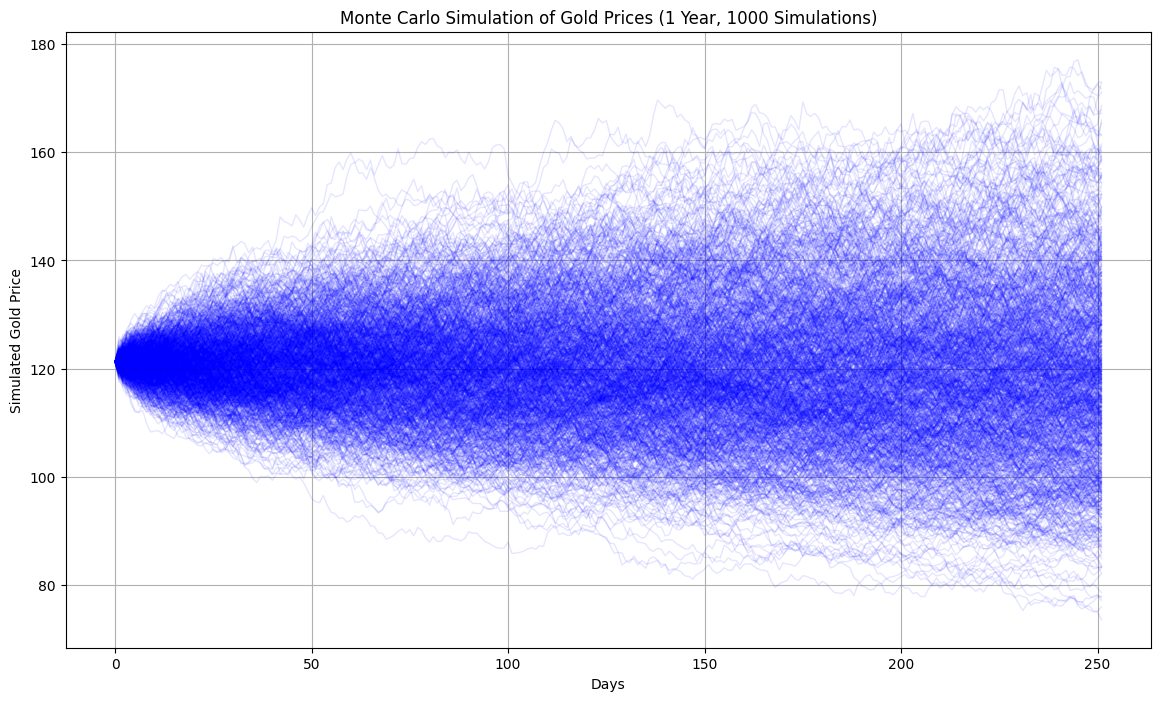

In [11]:
plt.figure(figsize=(14, 8))
plt.plot(simulated_prices, linewidth=1, alpha=0.1, color="blue")
plt.title("Monte Carlo Simulation of Gold Prices (1 Year, 1000 Simulations)")
plt.xlabel("Days")
plt.ylabel("Simulated Gold Price")
plt.grid(True)
plt.show()

# Step 8: Analyze Expected Price Range

At the end of the forecast period, calculate summary statistics for the simulated price distributions:

In [12]:
# Analyze the price distribution at the end of the forecast period
final_prices = simulated_prices[-1, :]
expected_price = np.mean(final_prices)
median_price = np.median(final_prices)
price_std_dev = np.std(final_prices)
percentile_5th = np.percentile(final_prices, 5)
percentile_95th = np.percentile(final_prices, 95)

# Display results
{
    "Expected Price (Mean)": expected_price,
    "Median Price": median_price,
    "Standard Deviation": price_std_dev,
    "5th Percentile": percentile_5th,
    "95th Percentile": percentile_95th
}


{'Expected Price (Mean)': 118.28862671874258,
 'Median Price': 117.44530154408363,
 'Standard Deviation': 17.603618087124218,
 '5th Percentile': 91.1842273810484,
 '95th Percentile': 149.2034685780267}